<a href="https://colab.research.google.com/github/juacastanori/SyS/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parcial 1: Señales y Sistemas 2024-1
##Presentado por Juan Jerónimo Castaño Rivera

#Preguntas

a). La distancia media entre dos señales periódicas
$x_1(t)$ ∈ ${R}$, $C$ y $x_2(t)$ ∈ $R$, $C$; se puede expresar a partir de la potencia media de la diferencia entre ellas:

$$
d(x_1, x_2) = \bar{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t)-x_2(t)|^{2}~dt
$$

Sea $x_1(t)$ y $x_2(t)$ dos señales como se muestra a continuación:

$x_1(t)=Ae^{jw_{o}t}$

$x_2(t)=Be^{j5w_{o}t}$

con $w_0 = \frac{2\pi}{T_0}$; $T,A,B ∈ R^{+}$. Determine la distancia entre las dos señales

Se puede comprobar la solución a partir de la librería sympy

In [ ]:
###Se comprueba usando la libreria sympy
import sympy as sym
t,T,To,A,B=sym.symbols("t T To A B",real=True)    #Variables simbólicas
wo=sym.symbols("wo",real=True)
x1=A*sym.exp(1j*wo*t)                             #Defino x_1
x2=B*sym.exp(5j*wo*t)                             #Defino x_2
wo=2*sym.pi/To
P1 = sym.limit(sym.integrate((x1)**2, (t, 0, T)) / T, T, sym.oo)          #Resuelvo el problema por partes, como una suma de límites de integrales
P3 = sym.limit(sym.integrate((x2)**2, (t, 0, T)) / T, T, sym.oo)
x3=x1*x2
P2 = -2*sym.limit(sym.integrate((x3), (t, 0, To)) / T, T, sym.oo)
P2
P=P1+P2+P3                                                                #Sumo
print("La distancia entre las dos señales es: ",P)                        #Obtengo la respuesta

La distancia entre las dos señales es:  A**2 + B**2


In [ ]:
#

b). Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de 5kHz, aplicado a la senal continua $x(t) = 3 cos(1000πt) +
5 sin(2000πt) + 10 cos(11000πt)$?. Realizar la simulación del proceso de discretizacion. En caso de que la discretización no sea apropiada, diseñe e implemente un conversor
adecuado para la señal estudiada.

En este caso, para tiempo discreto se utiliza la librería numpy. Se tiene en cuenta la función y la frecuencia de muestreo dada. Se observa que el periodo $T=1/500$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist    ###Importo numpy para tiempo discreto
A=3
B=5
C=10
w1=1000*np.pi                               ##Defino los parámetros de la señal
w2=2000*np.pi
w3=11000*np.pi
T1=2*np.pi/w1
T2=2*np.pi/w2
T3=2*np.pi/w3
F1=1/T1
F2=1/T2
F3=1/T3
T=T1                                        #Defino el periodo de x(t) encontrado
ti=0                                        #Empiezo para t=0
tf=2*T                                      #Se grafican dos periodos de la señal
fs=5000                                     #Frecuencia de muestreo dada, de 5kHz
tv=np.arange(ti,tf,1/fs)                    #vector de tiempo que incluye dos periodos cuasiperiódica

xv=A*np.cos(w1*tv)+B*np.sin(w2*tv)+C*np.cos(w3*tv)    #Función

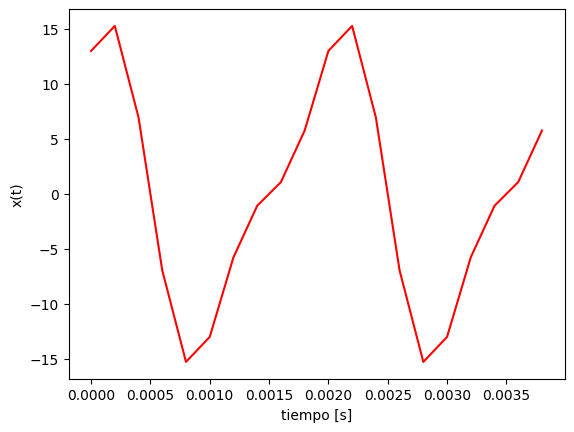

In [ ]:
plt.plot(tv,xv,"r")                  #Se grafica la función discretizada para Fs=5kHz
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

En este caso, el conversor no cumple la relación de Nyquist. Para nuestro caso, la frecuencia máxima seria la frecuencia F3, que sería de 5500 Hz.

Para que la discretización sea apropiada la frecuencia de muestreo del conversor debe ser de al menos 11000 Hz

Se puede implementar un conversor de 60500 Hz para realizar el anterior ejercicio, lo que equivaldría a 11 veces la frecuencia máxima:

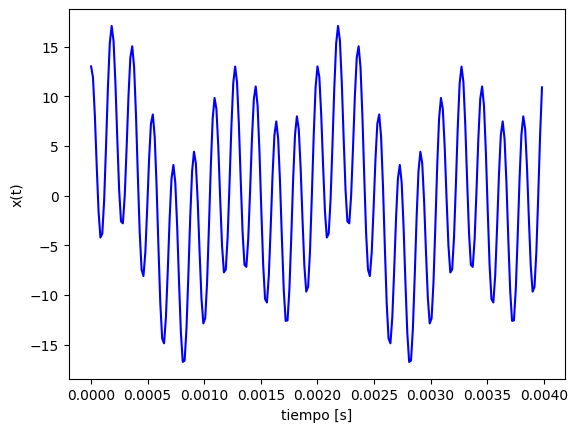

In [ ]:
fs=11*F3                                    #Fs adecuada para el ejercicio
tv=np.arange(ti,tf,1/fs)                    #Vector de tiempo que incluye dos periodos cuasiperiódica, para Fs adecuada

xv=A*np.cos(w1*tv)+B*np.sin(w2*tv)+C*np.cos(w3*tv)  #Función
plt.plot(tv,xv,"b")                                 #Gráfica
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

Se puede observar que, para una frecuencia de muestreo no adecuada, la señal se distorsiona completamente respecto a la señal original

In [ ]:
#

c) Implemente una simulación para encontrar la salida del sistema lineal e invariante al tiempo H{·}, con respuesta al escalón $h_ϵ[n] = [{2, 4, 1, 5, 0, 10}]$, n ∈ Z, ante la entrada
análoga en corriente $ x(t) = 20(cos(t/3) + cos(t/4))$ [A].
A: Amperios. Incluya los acondicionamientos necesarios de
discretización y cuantización, asumiendo un microprocesador de 4 bits con entrada análoga de 4mA a 20mA.

Primero discretizamos la señal de entrada $x(t)$, de la que obtuvimos un periodo $T=24π$

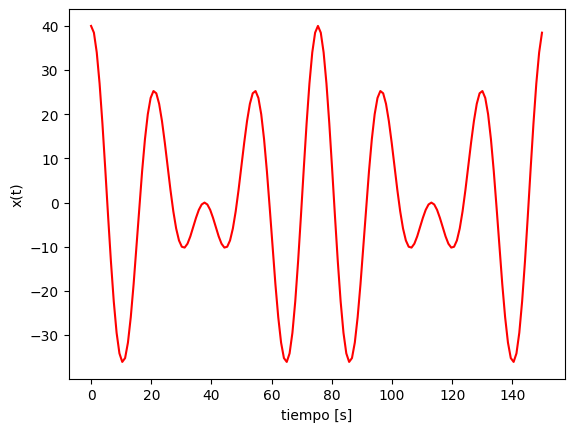

In [ ]:
import numpy as np                            #numpy para discretizar
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
A=20
w1=1/3
w2=1/4                                       #Defino los parámetros
T1=2*np.pi/w1
T2=2*np.pi/w2
F1=1/T1
F2=1/T2
ti=0
T=24*np.pi                                   #Periodo de x(t) encontrado
tf=2*T                                       #Para graficar dos periodos
Fs = 20*max(F1,F2)                           #Frecuencia muestreo adecuada
tv=np.arange(ti,tf,1/Fs)                     #Muestreo
xv=A*(np.cos(tv/3)+np.cos(tv/4))             #Señal en discreta
y=xv
plt.plot(tv,xv,"r")
plt.xlabel('tiempo [s]')                     #Gráfica de señales
plt.ylabel('x(t)')
plt.show()

Luego aplicamos la cuantización. Entre 4mA y 20mA

In [ ]:
y_min = 4*(10)**-3          #Límite minimo
y_max = 20*(10)**-3         #Límite máximo
def my_ceropen(x,ymin = -5, ymax = 5):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [ ]:
yv = my_ceropen(xv,ymin=4*(10)**-3,ymax=20*(10)**-3)    #Aplico la función cero y pendiente

Graficamos la  función original (roja) y la función a cuantizar (azul)

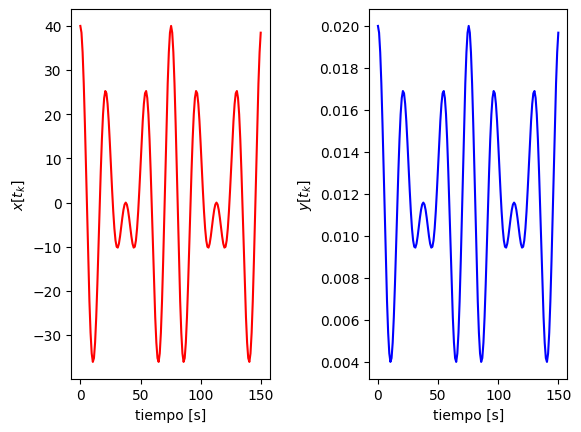

In [ ]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.2,wspace=0.5)
plt.show()

Definimos el código para cuantizar, número de bits, etc.

In [ ]:
ycs = my_ceropen(y, ymin=4*(10)**-3,ymax=20*(10)**-3 )   #Cero y pendiente
nbits = 4                                                #Numero de bits
rmin = 4*(10)**-3
rmax = 20*(10)**-3
ve = np.linspace(rmin,rmax,2**nbits)                     #Vector de estados
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1))            #Distancias y cero pendiente a vector cuantizacion / vectores columna
ind = np.argmin(d,axis=1)                                #Se aproxima el elemento ve[j] más cercano a xv[i] para genera señal cuantizada

In [ ]:
#función cuantización punto a punto
def my_cuantizador(yn, vq) :

  Ne = vq.shape[0]
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))
  ind = np.argmin(dn)
  return vq[ind]

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar
for i in range(ycs.shape[0]):
   if i==0:
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve))

Gráfica de señales

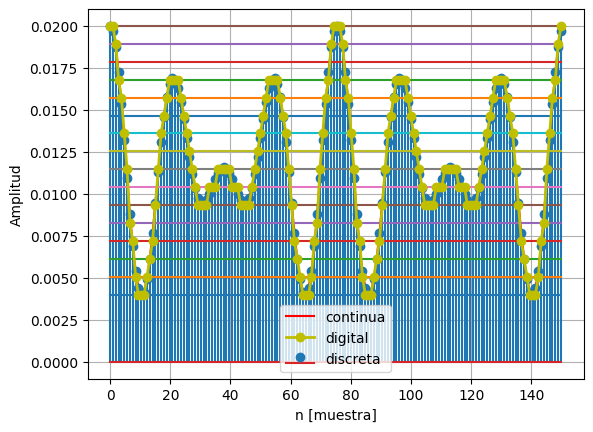

In [ ]:
plt.plot(tv,ycs,c='r', label='continua')#cs continua en rojo

plt.stem(tv,ycs, label='discreta')#cs discreta en azul

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada) en amarillo

plt.plot(tv,yq,c='y',marker='o',label='digital', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()

Ya con la señal de entrada de forma digital, se puede encontrar la salida del SLIT (sistema lineal e invariante en el tiempo)

Nos dan la respuesta al escalón. Sabemos que la derivada de la respuesta al escalón es la respuesta al impulso, que para tiempo discreto equivale a una resta

In [ ]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit se calcula con diff

Con esto se podrá encontrar la salida del sistema:
$y[n]=x[n]*h[n]$
Para tiempo discreto, la convolución equivale a una sumatoria

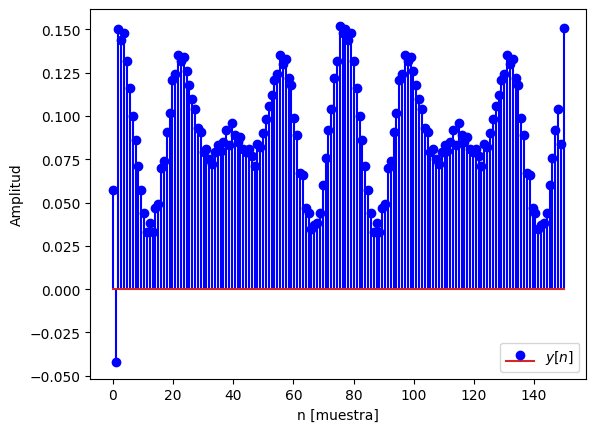

In [ ]:
y = np.convolve(xq,h,mode='same')#respuesta del slit con convolve-> se asegura tamaños iguales con mode=same
#Se grafica señal de salida
plt.stem(tv,y,'b',label='$y[n]$')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()

Esta sería la salida del sistema